## Adelaïde Warbler presence on Puerto Rico islands

### The question

<div>
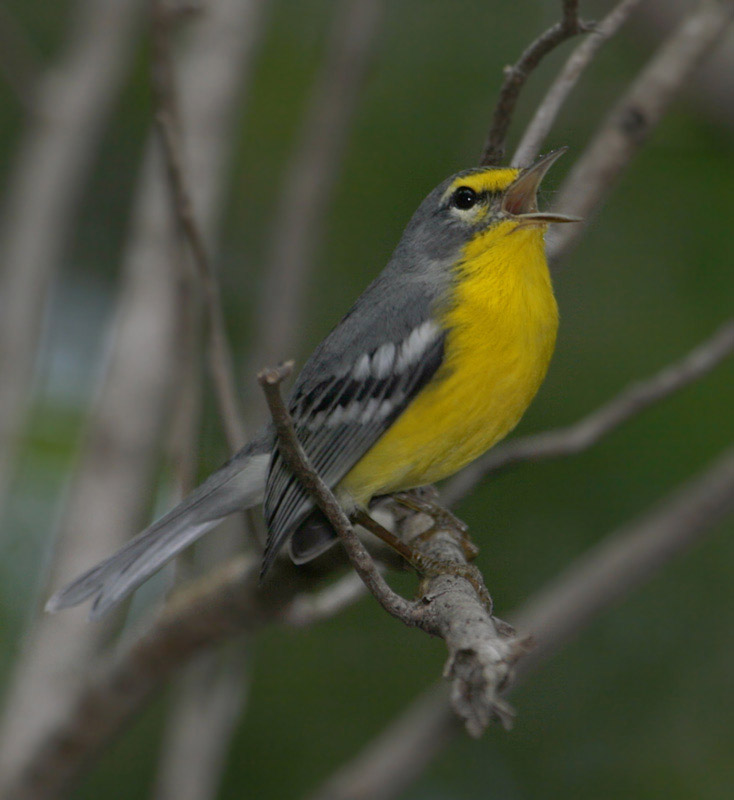
</div>


Scientists have long been interested in how island geography affects the presence or absence of bird species. This dataset comprises 50 islands off the coast of Puerto Rico. For each island we have its area in km<sup>2</sup>, its distance from the mainland and whether the Adelaïde Warbler is present or absent.
 
We could ask the question, does island area affect the presence of the Adelaïde Warbler? But that's only part of the story. We might be interested in a more predictive question such as, given an island's area, what is the probability of finding the Adelaïde Warbler on that island?

So our null and alternative hypotheses are

- $H_0$: island area does not affect the presence of the Adelaïde Warbler
- $H_A$: island area does affect the presence of the Adelaïde Warbler

And, if we reject the null hypothesis, we want to know how island area affects the probability of the presence of the Adelaïde Warbler?

### Imports

In [2]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Binomial

### Load and print the data

First we read in the dataset and print it to see how it looks and what the variable names, types and values are.

In [3]:
warbler = pd.read_csv('../Datasets/warbler.csv')
warbler

,incidence,area,isolation
0,present,7.928,3.317
1,absent,1.925,7.554
2,present,2.045,5.883
3,absent,4.781,5.932
4,absent,1.536,5.308
5,present,7.369,4.934
6,present,8.599,2.882
7,absent,2.422,8.771
8,present,6.403,6.092
9,present,7.199,6.977


Variable names are "incidence", "area" and "isolation". We will ignore isolation for now. The variable "area" is continuous and is the area in km<sup>2</sup> of each island. The variable "incidence" is categorical and indicates whether the Adelaïde Warbler was present or absent on each island.

"incidence" is the response variable and "area" is the explanatory variable.

### Plot the data


As we have one categorical variable and one numerical variable (similar to the ladybird sizes) you might assume that we use a swarm or box plot like so with the response variable of `incidence` on the *y*-axis.

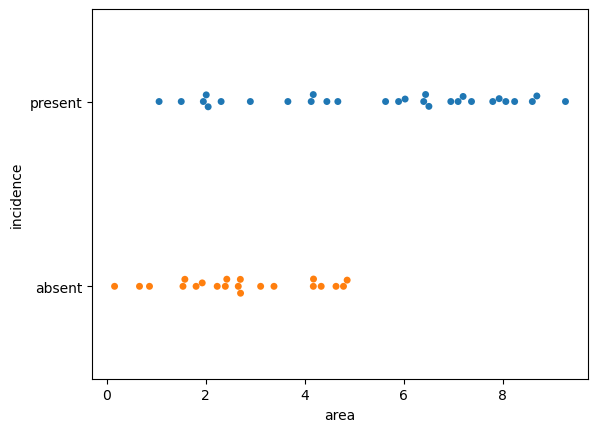

In [6]:
sns.swarmplot(x='area', y='incidence', data=warbler);

The interpretation of this plot is that for small islands the warbler may be present or not and for larger islands the warbler is always present. So it looks as if we can reject the null model - we'll formally test that in a moment.

But that doesn't answer our other question, how does island area affect the probability of the presence of the Adelaïde Warbler?

To answer that question we need another type of plot that shows us the probability of presence of the Adelaïde Warbler as area changes. Seaborn's lmplot does this with the added keyword `logistic=True`. But before we do that we need to modify the data.

In the `incidence` column of the dataframe we are going to replace `present` with the number 1, and `absent` with the number 0. This allows lmplot to plot the data with a regression line, and allows `glm` to fit a model. The variable `incidence` is called a **binary variable** because it has only two values, i.e., presence/absence or 0/1. Model fitting with a binary response variable is called **logistic regression**.

In [4]:
warbler['incidence01'] = warbler['incidence'].replace({'present':1, 'absent':0})
warbler

,incidence,area,isolation,incidence01
0,present,7.928,3.317,1
1,absent,1.925,7.554,0
2,present,2.045,5.883,1
3,absent,4.781,5.932,0
4,absent,1.536,5.308,0
5,present,7.369,4.934,1
6,present,8.599,2.882,1
7,absent,2.422,8.771,0
8,present,6.403,6.092,1
9,present,7.199,6.977,1


Now let's plot the data with a regression line with lmplot.

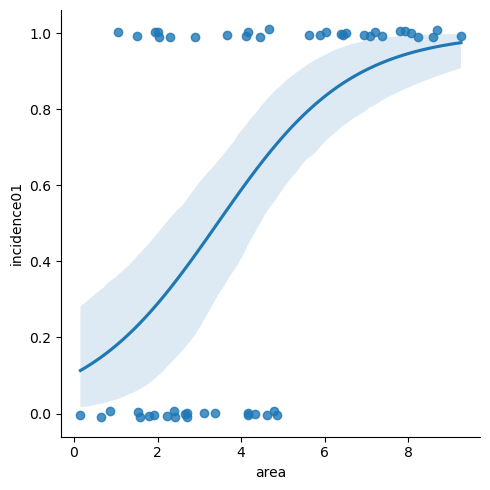

In [5]:
sns.lmplot(x='area', y='incidence01', y_jitter=0.01, logistic=True, data=warbler);

The blue circles along *y* = 0 represent islands where the Adelaïde Warbler ia absent and the blue circles along *y* = 1 represent islands where the Adelaïde Warbler is present. The *y* values of the data have been jittered to make the circles easier to see.

Seaborn has fitted a blue regression line with 95% CI. It shows the probability of the Adelaïde Warbler being present against island area. For example, on the smallest islands, the probability of presence is about 0.1, whereas on the largest islands the probability of presence is almost 1.

To fit a model which has a binary variable like "incidence" we use the `glm` method with `family=Binomial()`. The code below shows how it works. 

### Code and fit the model

In [6]:
formula = 'incidence01 ~ area'
fit = glm(formula, warbler, family=Binomial()).fit()
fit.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-2.1554,0.754,-2.857,0.004,-3.634,-0.677
area,0.6272,0.186,3.370,0.001,0.262,0.992


### Interpret the summary of the model fit

Both `Intercept` and `area` are significant (*p* < 0.05 for both). However, unlike `ols` where the coefficient estimates are directly interpretable as the *y*-intercept and slope of a straight line, when we use `glm` with `family=Binomial()` these coefficients require a little more manipulation. The regression line fitted to the data has the form

$$
\mathrm{probability\ the\ Adelaïde\ Warbler\ is\ present} = \frac{1}{1+e^{-\mathrm{Intercept} - \mathrm{slope} \times \mathrm{area}}}
$$

Substituting in the values from the summary table we have

$$
\mathrm{probability\ the\ Adelaïde\ Warbler\ is\ present} = \frac{1}{1+e^{2.16 - 0.63 \times \mathrm{area}}}
$$

We won't go into the reason for this complicated formula, and it isn't really necessary.

### Report the outcome of the test

A logistic regression of Adelaïde Warbler incidence against island area was performed. There was a statistically significant rise in the probability of the Adelaïde Warbler being present with island area (*z* = 3.4, *p* = 0.001). The mean estimated probability of incidence is

$$
\mathrm{probability\ the\ Adelaïde\ Warbler\ is\ present} = \frac{1}{1+e^{2.16 - 0.63\times\mathrm{area}}}
$$

where area is measured in km<sup>2</sup>.